In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal

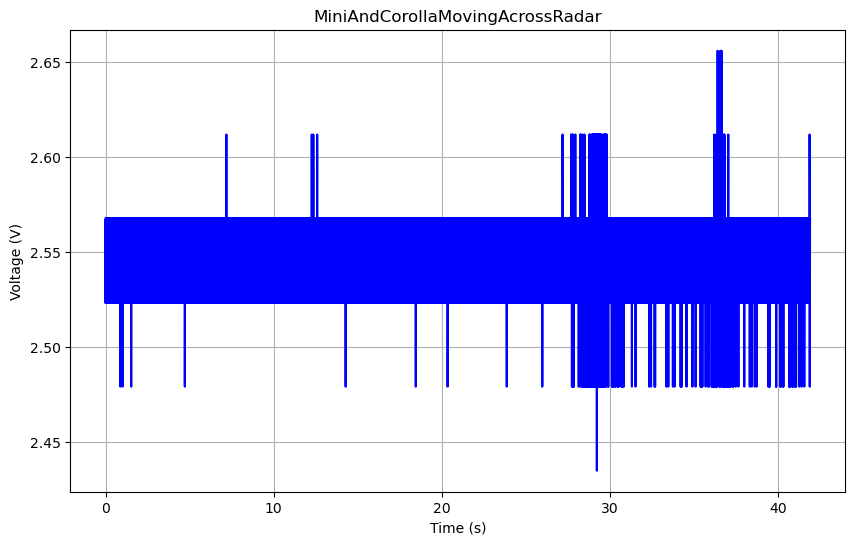

In [3]:
# Initialize empty lists to store time and voltage data
time_data = []
voltage_data = []

# Read data from the text file
with open('PointingAcrossRoad/MiniandCorolla.txt', 'r') as file:
    next(file)  # Skip the header line
    next(file)
    for line in file:
        # Split each line into columns using whitespace as the delimiter
        columns = line.strip().split()
        if len(columns) == 2:
            time_data.append(float(columns[0]))
            voltage_data.append(float(columns[1]))

voltage_data = np.array(voltage_data) #converting voltage_data into a numpy array


# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(time_data, voltage_data, color='b')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('MiniAndCorollaMovingAcrossRadar')
plt.grid(True)

# Show the plot
plt.show()


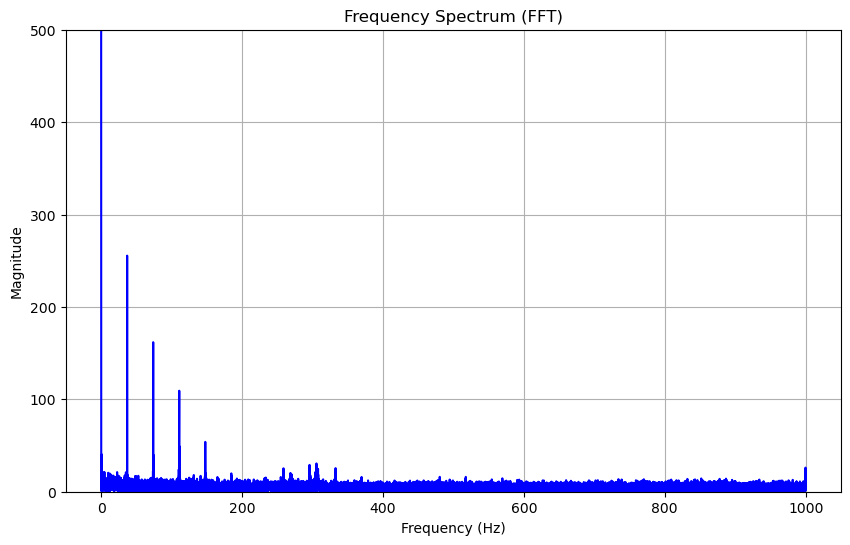

In [4]:
# Read the data from the text file (assuming you've already read the data as time_data and voltage_data)

# Sampling frequency (inverse of the time step)
sampling_frequency = 1 / (time_data[1] - time_data[0])

# Perform the FFT
fft_result = np.fft.fft(voltage_data)
fft_freqs = np.fft.fftfreq(len(voltage_data), 1 / sampling_frequency)

# Calculate the magnitude of the FFT result
fft_magnitude = np.abs(fft_result)

# Plot the frequency spectrum
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(fft_freqs[:len(fft_freqs) // 2], fft_magnitude[:len(fft_magnitude) // 2], color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.ylim(0,500)
plt.title('Frequency Spectrum (FFT)')
plt.grid(True)

# Show the plot
plt.show()

2.557127825073049


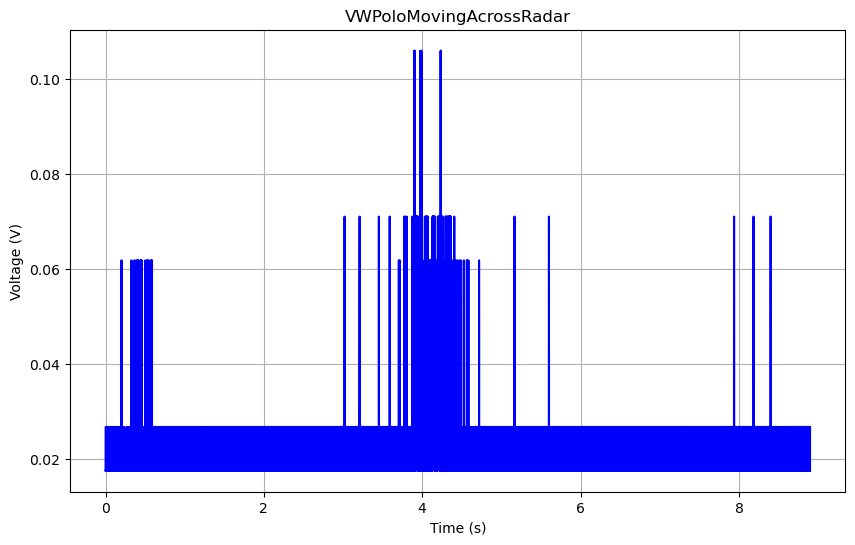

In [5]:
# Initialize empty lists to store time and voltage data
time_data = []
voltage_data = []

# Read data from the text file
with open('PointingAcrossRoad/VWPolo.txt', 'r') as file:
    next(file)  # Skip the header line
    next(file)
    for line in file:
        # Split each line into columns using whitespace as the delimiter
        columns = line.strip().split()
        if len(columns) == 2:
            time_data.append(float(columns[0]))
            voltage_data.append(float(columns[1]))

voltage_data = np.array(voltage_data) #converting voltage_data into a numpy array
print(np.average(voltage_data))

voltage_data = voltage_data - 2.55
voltage_data = abs(voltage_data)

# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(time_data, voltage_data, color='b')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('VWPoloMovingAcrossRadar')
plt.grid(True)

# Show the plot
plt.show()


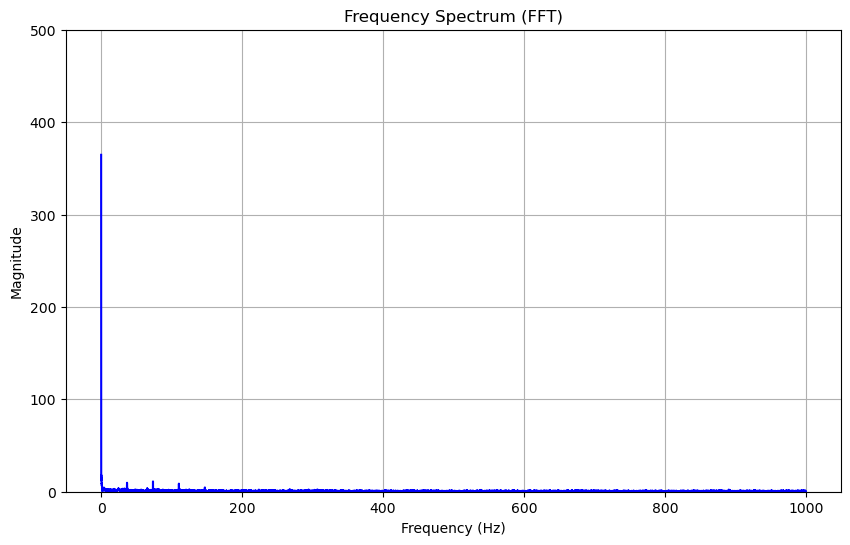

In [6]:
# Read the data from the text file (assuming you've already read the data as time_data and voltage_data)

# Sampling frequency (inverse of the time step)
sampling_frequency = 1 / (time_data[1] - time_data[0])

# Perform the FFT
fft_result = np.fft.fft(voltage_data)
fft_freqs = np.fft.fftfreq(len(voltage_data), 1 / sampling_frequency)

# Calculate the magnitude of the FFT result
fft_magnitude = np.abs(fft_result)

# Plot the frequency spectrum
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(fft_freqs[:len(fft_freqs) // 2], fft_magnitude[:len(fft_magnitude) // 2], color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.ylim(0,500)
plt.title('Frequency Spectrum (FFT)')
plt.grid(True)

# Show the plot
plt.show()

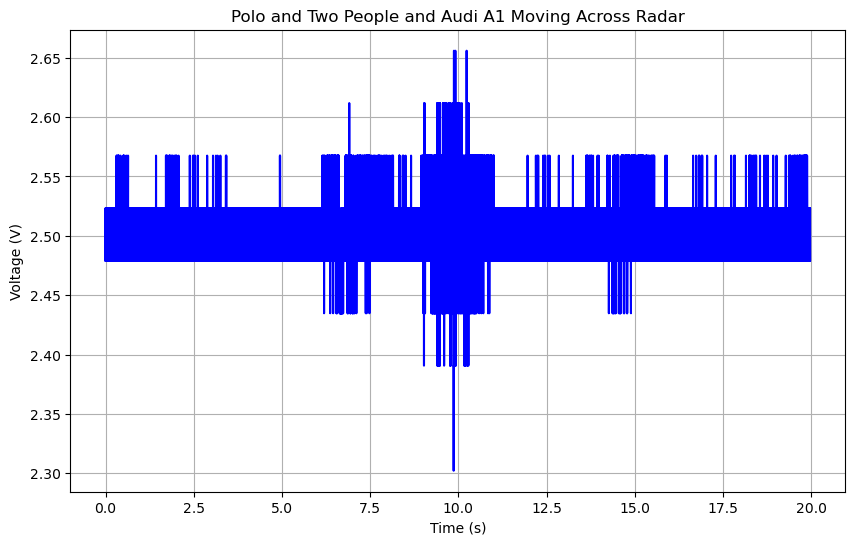

In [7]:
# Initialize empty lists to store time and voltage data
time_data = []
voltage_data = []

# Read data from the text file
with open('PointingAcrossRoad/20khzSampling/PoloTwoPeopleAudiA1.txt', 'r') as file:
    next(file)  # Skip the header line
    next(file)
    for line in file:
        # Split each line into columns using whitespace as the delimiter
        columns = line.strip().split()
        if len(columns) == 2:
            time_data.append(float(columns[0]))
            voltage_data.append(float(columns[1]))

voltage_data = np.array(voltage_data) #converting voltage_data into a numpy array


# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(time_data, voltage_data, color='b')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Polo and Two People and Audi A1 Moving Across Radar')
plt.grid(True)

# Show the plot
plt.show()


# Low Pass Filtering the data using a moving average filter

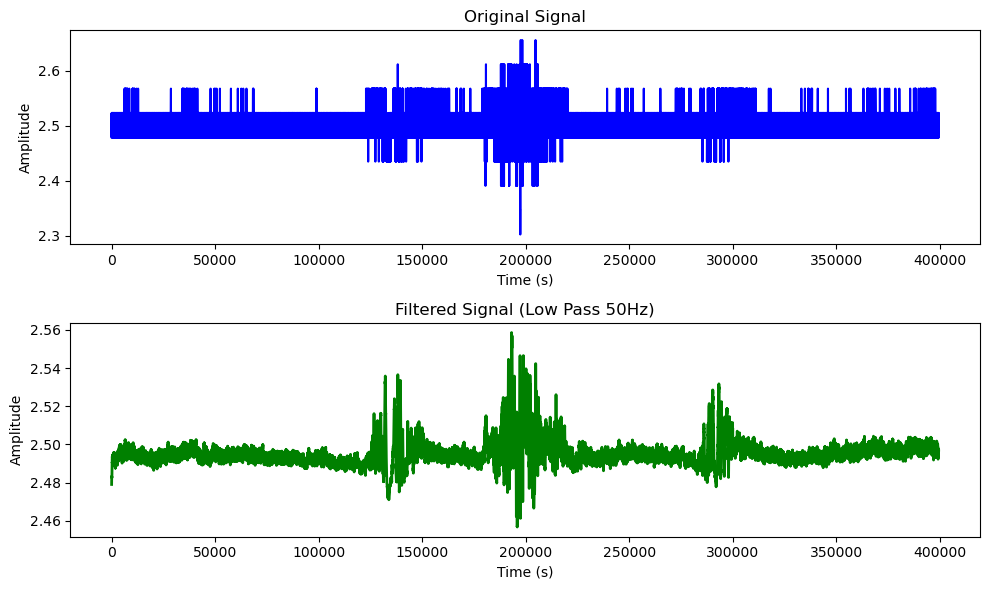

In [8]:
class LowpassFilter:
    def __init__(self, alpha):
        """
        Initialize the lowpass filter.

        Args:
        alpha (float): Smoothing factor (0 < alpha < 1). A smaller alpha gives stronger smoothing.
        """
        self.alpha = alpha
        self.filtered_value = None

    def update(self, new_value):
        """
        Update the filter with a new value.

        Args:
        new_value (float): New input value.

        Returns:
        float: Filtered output.
        """
        if self.filtered_value is None:
            self.filtered_value = new_value
        else:
            self.filtered_value = self.alpha * new_value + (1 - self.alpha) * self.filtered_value
        return self.filtered_value

# Example usage
alpha = 0.005  # Smoothing factor (adjust as needed, lower values provide stronger smoothing)
lowpass_filter = LowpassFilter(alpha)

# Apply the lowpass filter to the input data
filtered_data = [lowpass_filter.update(value) for value in voltage_data]
filtered_data = np.array(filtered_data)
# Now, filtered_data contains the filtered values.


# Plot the original and filtered signals
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(voltage_data, 'b-', label='Original Signal')
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(filtered_data, 'g-', linewidth=2, label='Filtered Signal')
plt.title('Filtered Signal (Low Pass 50Hz)')
#plt.ylim(2.4,)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


## Downsampling the above data to 1000ks/s

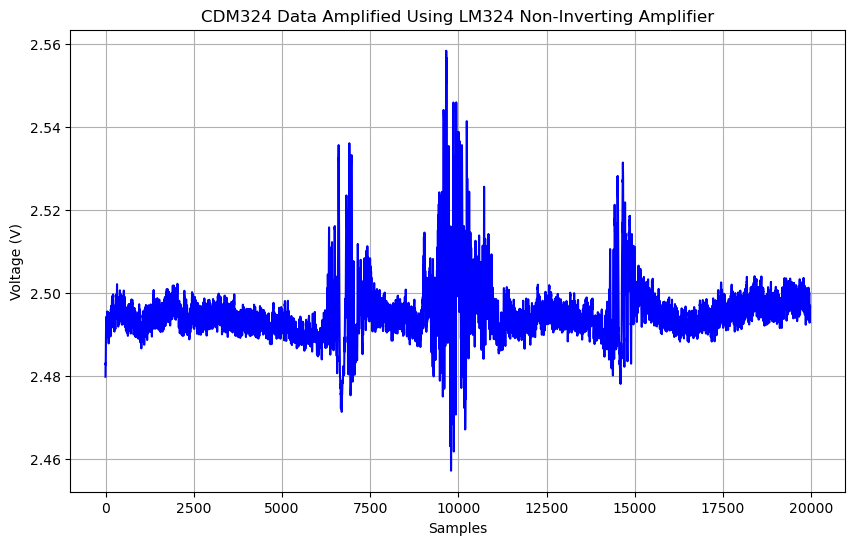

In [13]:
# Original data at 20 ks/s
original_data = filtered_data

# Downsampling factor (20 ks/s to 1 ks/s)
downsampling_factor = 20

# Calculate the length of the downsampled array
downsampled_length = len(original_data) // downsampling_factor

# Create an empty array for the downsampled data
downsampled_data = np.empty(downsampled_length)

# Perform downsampling by averaging
for i in range(downsampled_length):
    start_index = i * downsampling_factor
    end_index = start_index + downsampling_factor
    downsampled_data[i] = np.mean(original_data[start_index:end_index])


#downsampled_data = abs(downsampled_data - 2.5)
#downsampled_data = downsampled_data[0:1000]

# Now, downsampled_data contains the downsampled array at 1 ks/s
# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(downsampled_data, color='b')
plt.xlabel('Samples')
plt.ylabel('Voltage (V)')
plt.title('CDM324 Data Amplified Using LM324 Non-Inverting Amplifier')
plt.savefig('CDMLM324Amplifier.pdf',format = 'pdf')
plt.grid(True)

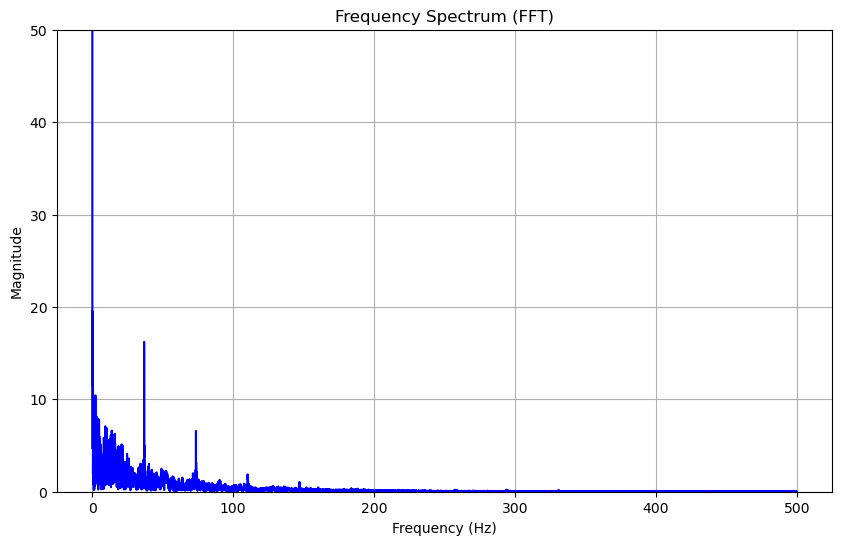

In [10]:
# Read the data from the text file (assuming you've already read the data as time_data and voltage_data)

# Sampling frequency (inverse of the time step)
sampling_frequency = 1000

# Perform the FFT
fft_result = np.fft.fft(downsampled_data)
fft_freqs = np.fft.fftfreq(len(downsampled_data), 1 / sampling_frequency)

# Calculate the magnitude of the FFT result
fft_magnitude = np.abs(fft_result)

# Plot the frequency spectrum
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(fft_freqs[:len(fft_freqs) // 2], fft_magnitude[:len(fft_magnitude) // 2], color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.ylim(0,50)
plt.title('Frequency Spectrum (FFT)')
plt.grid(True)

# Show the plot
plt.show()


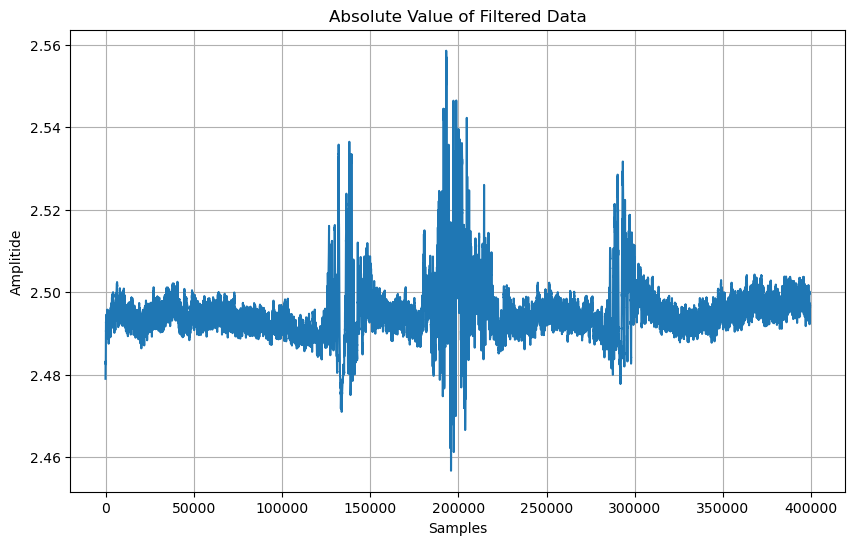

In [11]:
filtered_signal = abs(filtered_data)


plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(filtered_signal)
plt.xlabel('Samples')
plt.ylabel('Amplitide')
plt.title('Absolute Value of Filtered Data')
plt.grid(True)

# Show the plot
plt.show()

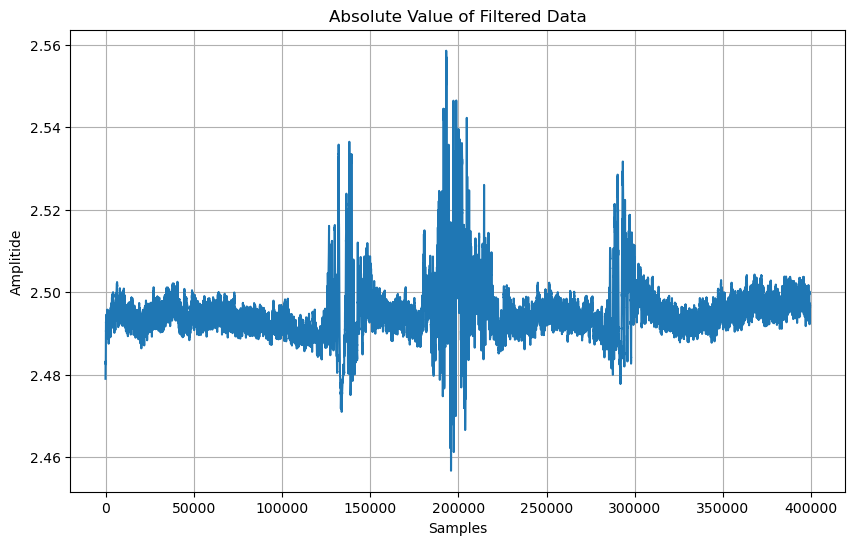

In [12]:
filtered_signal[filtered_signal<0.02] = 0

plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(filtered_signal)
plt.xlabel('Samples')
plt.ylabel('Amplitide')
plt.title('Absolute Value of Filtered Data')
plt.grid(True)

# Show the plot
plt.show()